# Traitement automatique de la langue en Python - correction

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Exercice 1

In [ ]:
corpus = { 
 'a' : "Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.",
 'b' : "Professor Plum has a green plant in his study.",
 'c' : "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."
}
terms = {
 'a' : [ i.lower() for i in corpus['a'].split() ],
 'b' : [ i.lower() for i in corpus['b'].split() ],
 'c' : [ i.lower() for i in corpus['c'].split() ]
 }

from math import log

QUERY_TERMS = ['green', 'plant']

def tf(term, doc, normalize=True):
    doc = doc.lower().split()
    if normalize:
        return doc.count(term.lower()) / float(len(doc))
    else:
        return doc.count(term.lower()) / 1.0


def idf(term, corpus):
    num_texts_with_term = len([True for text in corpus if term.lower()
                              in text.lower().split()])
    try:
        return 1.0 + log(float(len(corpus)) / num_texts_with_term)
    except ZeroDivisionError:
        return 1.0
    
def tf_idf(term, doc, corpus):
    return tf(term, doc) * idf(term, corpus)


query_scores = {'a': 0, 'b': 0, 'c': 0}
for term in [t.lower() for t in QUERY_TERMS]:
    for doc in sorted(corpus):
        score = tf_idf(term, corpus[doc], corpus.values())
        query_scores[doc] += score

print("Score TF-IDF total pour le terme '{}'".format(' '.join(QUERY_TERMS), ))
for (doc, score) in sorted(query_scores.items()):
    print(doc, score)

Score TF-IDF total pour le terme 'green plant'
a 0.10526315789473684
b 0.26727390090090714
c 0.1503415692567603


Deux documents possibles : b ou c (a ne contient pas le mot "plant"). B est plus court : donc *green plant* "pèse" plus.

In [ ]:
QUERY_TERMS = ['plant', 'green']

query_scores = {'a': 0, 'b': 0, 'c': 0}
for term in [t.lower() for t in QUERY_TERMS]:
    for doc in sorted(corpus):
        score = tf_idf(term, corpus[doc], corpus.values())
        query_scores[doc] += score

print("Score TF-IDF total pour le terme '{}'".format(' '.join(QUERY_TERMS), ))
for (doc, score) in sorted(query_scores.items()):
    print(doc, score)

Score TF-IDF total pour le terme 'plant green'
a 0.10526315789473684
b 0.26727390090090714
c 0.1503415692567603


Le score TF-IDF ne tient pas compte de l'ordre des mots. Approche "bag of words".

In [ ]:
QUERY_TERMS = ['green']
term = [t.lower() for t in QUERY_TERMS]

In [ ]:
term = 'green'

query_scores = {'a': 0, 'b': 0, 'c': 0}

for doc in sorted(corpus):
    score = tf_idf(term, corpus[doc], corpus.values())
    query_scores[doc] += score

print("Score TF-IDF total pour le terme '{}'".format(term))
for (doc, score) in sorted(query_scores.items()):
    print(doc, score)

Score TF-IDF total pour le terme 'green'
a 0.10526315789473684
b 0.1111111111111111
c 0.0625


In [ ]:
len(corpus['b'])/len(corpus['a'])

0.4423076923076923

Scores proches entre a et b. a contient deux fois 'green', mais b est plus de deux fois plus court, donc le score est plus élevé. Il existe [d'autres variantes de tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Il faut choisir celui qui correspond le mieux à vos besoins.

## Exercice 2

### Elections américaines 

In [ ]:
import json
import nltk

USER_ID = '107033731246200681024'

with open('./ressources_googleplus/' + USER_ID + '.json', 'r') as f:
    activity_results=json.load(f)

all_content = " ".join([ a['object']['content'] for a in activity_results ])
tokens = all_content.split()
text = nltk.Text(tokens)

In [ ]:
text.concordance('Hillary')

Displaying 2 of 2 matches:
                                    Hillary in Pennsylvania. There's a transit 
will pay for rides to the polls for Hillary voters via Uber and Lyft. I just su


In [ ]:
text.concordance('Trump')

Displaying 1 of 1 matches:
."﻿ I dreamed last night that Donald Trump was taking people on a tour through 


In [ ]:
text.concordance('vote')

Displaying 8 of 8 matches:
                                     Vote has created a crowdfunding campaign 
                                     Vote effort for Hillary in Pennsylvania. 
didates and which contacts might not vote on election day. Next, we provide yo
 http://oreil.ly/2f54ypw﻿ Start-Up & Vote is a movement to encourage tech comm
ent to encourage tech communities to vote early and vote together. Get a group
e tech communities to vote early and vote together. Get a group together for y
ty resident, I hope you turn out and vote for her in November. If you'd like t
entation of the program unfolds.﻿ My vote for Crunchies 'Best Technology 2013'


In [ ]:
text.concordance('politics')

Displaying 2 of 2 matches:
ge the way you think about today's politics as well. I am so glad that Russ Ro
pears to be a deeper dive into the politics of top billionaires. In this time 


In [ ]:
fdist = text.vocab()
fdist['Hillary'], fdist['Trump'], fdist['vote'], fdist['politics']

(2, 1, 5, 2)

### Loi Zipf 

In [ ]:
%matplotlib inline

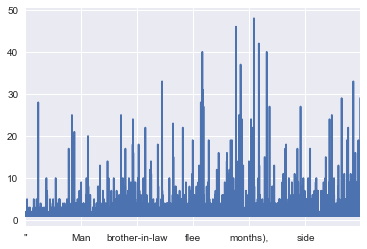

In [ ]:
fdist = text.vocab()

no_stopwords = [(k,v) for (k,v) in fdist.items() if k.lower() \
                         not in nltk.corpus.stopwords.words('english')]

#nltk a été porté en python récemment, quelques fonctionnalités se sont perdues 
#(par exemple, Freq Dist n'est pas toujours ordonné par ordre décroissant)
#fdist_no_stopwords = nltk.FreqDist(no_stopwords)
#fdist_no_stopwords.plot(100, cumulative = True)

#le plus rapide : passer par pandas
import pandas as p

df_nostopwords=p.Series(dict(no_stopwords))
df_nostopwords.sort_values(ascending=False)
df_nostopwords.plot()

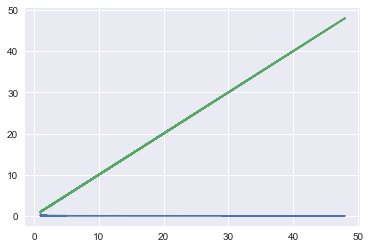

In [ ]:
import matplotlib.pyplot as plt 

df_nostopwords=p.Series(dict(no_stopwords))
df_nostopwords.sort_values(ascending=False)
df_nostopwords=p.DataFrame(df_nostopwords)
df_nostopwords.rename(columns={0:'count'},inplace=True)
df_nostopwords['one']=1
df_nostopwords['rank']=df_nostopwords['one'].cumsum()
df_nostopwords['zipf_law']=df_nostopwords['count'].ix[0]/df_nostopwords['rank']
df_nostopwords=df_nostopwords[1:]
plt.plot(df_nostopwords['count'],df_nostopwords['zipf_law'])
plt.plot(df_nostopwords['count'],df_nostopwords['count'])

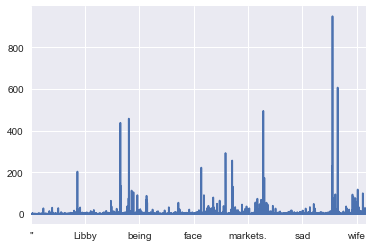

In [ ]:
df = p.Series(fdist)
df.sort_values(ascending=False)
df.plot()

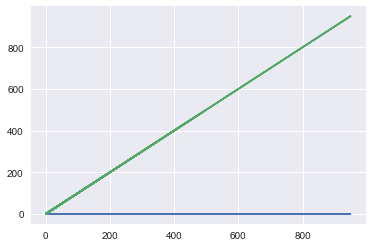

In [ ]:
df = p.Series(fdist)
df.sort_values(ascending=False)
df=p.DataFrame(df)
df.rename(columns={0:'count'},inplace=True)
df['one']=1
df['rank']=df['one'].cumsum()
df['zipf_law']=df['count'].ix[0]/df['rank']
df=df[1:]
plt.plot(df['count'],df['zipf_law'])
plt.plot(df['count'],df['count'])

### Diversité du vocabulaire 

In [ ]:
def lexical_diversity(token_list):
    return len(token_list) / len(set(token_list))

USER_ID = '107033731246200681024'

with open('./ressources_googleplus/' + USER_ID + '.json', 'r') as f:
    activity_results=json.load(f)

all_content = " ".join([ a['object']['content'] for a in activity_results ])
tokens = all_content.split()
text = nltk.Text(tokens)

lexical_diversity(tokens)

3.152611093091145

## Exercice 3

### 3-1 Autres termes de recherche

In [ ]:
import json
import nltk


path = 'ressources_googleplus/107033731246200681024.json'
text_data = json.loads(open(path).read())

QUERY_TERMS = ['open','data']

activities = [activity['object']['content'].lower().split() \
              for activity in text_data \
                if activity['object']['content'] != ""]

# Le package TextCollection contient un module tf-idf
tc = nltk.TextCollection(activities)

relevant_activities = []

for idx in range(len(activities)):
    score = 0
    for term in [t.lower() for t in QUERY_TERMS]:
        score += tc.tf_idf(term, activities[idx])
    if score > 0:
        relevant_activities.append({'score': score, 'title': text_data[idx]['title'],
                              'url': text_data[idx]['url']})

# Tri par score et présentation des résultats 

relevant_activities = sorted(relevant_activities, 
                             key=lambda p: p['score'], reverse=True)
c=0
for activity in relevant_activities:
    if c < 6:
        print(activity['title'])
        print('\tLink: {}'.format(activity['url']))
        print('\tScore: {}'.format(activity['score']))
        c+=1

This is a really important piece about open data and platforms.
	Link: https://plus.google.com/+TimOReilly/posts/fo9uxWTctHb
	Score: 0.5146372054549713
My thoughts on free software, open source, and open data, in response to Eric Raymond's excellent short...
	Link: https://plus.google.com/+TimOReilly/posts/KpwvpgcY8LD
	Score: 0.26611050388622276
Well worth reading.  We are going to need a lot more climate data, and a lot more people figuring out...
	Link: https://plus.google.com/+TimOReilly/posts/hThGqXZftz8
	Score: 0.16174312171441954
As you may know, I'm a big fan of the idea that government should act as a platform, not always as an...
	Link: https://plus.google.com/+TimOReilly/posts/55MBeEgma4C
	Score: 0.1600316894864654
If you love Hamilton, as I do, and you're interested in data visualization, you'll find this fascinating...
	Link: https://plus.google.com/+TimOReilly/posts/NNsiSo8K7B7
	Score: 0.15298461560665425
Data can play a great role in advancing sustainability. I'm quoted i

### 3-2 Autres métriques de distance

In [ ]:
from math import log

def tf_binary(term, doc):
    doc_l = [d.lower() for d in doc]
    if term.lower() in doc:
        return 1.0
    else:
        return 0.0
    
def tf_rawfreq(term, doc):
    doc_l = [d.lower() for d in doc]
    return doc_l.count(term.lower())

def tf_lognorm(term,doc):
    doc_l = [d.lower() for d in doc]
    if doc_l.count(term.lower()) > 0:
        return 1.0 + log(doc_l.count(term.lower()))
    else:
        return 1.0

def idf(term,corpus):
    num_texts_with_term = len([True for text in corpus\
                               if term.lower() in text]) 
    try:
        return log(float(len(corpus) / num_texts_with_term))
    except ZeroDivisionError:
        return 1.0

def idf_init(term, corpus):
    num_texts_with_term = len([True for text in corpus\
                               if term.lower() in text])
    try:
        return 1.0 + log(float(len(corpus)) / num_texts_with_term)
    except ZeroDivisionError:
        return 1.0    
    
def idf_smooth(term,corpus):
    num_texts_with_term = len([True for text in corpus\
                               if term.lower() in text]) 
    try:
        return log(1.0 + float(len(corpus) / num_texts_with_term))
    except ZeroDivisionError:
        return 1.0
    
def tf_idf0(term, doc, corpus):
    return tf_binary(term, doc) * idf(term, corpus)

def tf_idf1(term, doc, corpus):
    return tf_rawfreq(term, doc) * idf(term, corpus)

def tf_idf2(term, doc, corpus):
    return tf_lognorm(term, doc) * idf(term, corpus)

def tf_idf3(term, doc, corpus):
    return tf_rawfreq(term, doc) * idf_init(term, corpus)

def tf_idf4(term, doc, corpus):
    return tf_lognorm(term, doc) * idf_init(term, corpus)

def tf_idf5(term, doc, corpus):
    return tf_rawfreq(term, doc) * idf_smooth(term, corpus)

def tf_idf6(term, doc, corpus):
    return tf_lognorm(term, doc) * idf_smooth(term, corpus)

In [ ]:
import json
import nltk


path = 'ressources_googleplus/107033731246200681024.json'
text_data = json.loads(open(path).read())

QUERY_TERMS = ['open','data']

activities = [activity['object']['content'].lower().split() \
              for activity in text_data \
                if activity['object']['content'] != ""]

relevant_activities = []

   
for idx in range(len(activities)):
    score = 0
    for term in [t.lower() for t in QUERY_TERMS]:
        score += tf_idf1(term, activities[idx],activities)
    if score > 0:
        relevant_activities.append({'score': score, 'title': text_data[idx]['title'],
                              'url': text_data[idx]['url']})

# Tri par score et présentation des résultats 

relevant_activities = sorted(relevant_activities, 
                             key=lambda p: p['score'], reverse=True)
c=0
for activity in relevant_activities:
    if c < 6:
        print(activity['title'])
        print('\tLink: {}'.format(activity['url']))
        print('\tScore: {}'.format(activity['score']))
        c+=1

The 10-year contract for the US recreation.gov site  is up for renewal, and the Department of the Interior...
	Link: https://plus.google.com/+TimOReilly/posts/cmjFvKC5S9v
	Score: 22.184504710640297
Great talk by Maciej Ceglowski.  Funny, smart, and with an important message.  Just like Maciej all ...
	Link: https://plus.google.com/+TimOReilly/posts/b17bWhGfkH3
	Score: 18.205169257191855
As you may know, I'm a big fan of the idea that government should act as a platform, not always as an...
	Link: https://plus.google.com/+TimOReilly/posts/55MBeEgma4C
	Score: 13.92275698532249
Can We Use Data to Make Better Regulations?

Evgeny Morozov either misunderstands or misrepresents the...
	Link: https://plus.google.com/+TimOReilly/posts/gboAUahQwuZ
	Score: 10.402953861252488
The title of this piece doesn't do it justice. The description does better: "This talk discusses how...
	Link: https://plus.google.com/+TimOReilly/posts/YjzTq5x45MC
	Score: 7.802215395939366
My thoughts on free software, ope

Pensez-vous que pour notre cas la fonction tf_binary est justifiée ?

## Exercice 4

In [ ]:
import json
import nltk

path = 'ressources_googleplus/107033731246200681024.json'
data = json.loads(open(path).read())

# Sélection des textes qui ont plus de 1000 mots
data = [ post for post in json.loads(open(path).read()) \
         if len(post['object']['content']) > 1000 ]

all_posts = [post['object']['content'].lower().split() 
             for post in data ]

tc = nltk.TextCollection(all_posts)

# Calcul d'une matrice terme de recherche x document
# Renvoie un score tf-idf pour le terme dans le document

td_matrix = {}
for idx in range(len(all_posts)):
    post = all_posts[idx]
    fdist = nltk.FreqDist(post)

    doc_title = data[idx]['title']
    url = data[idx]['url']
    td_matrix[(doc_title, url)] = {}

    for term in fdist.keys():
        td_matrix[(doc_title, url)][term] = tc.tf_idf(term, post)

distances = {}

for (title1, url1) in td_matrix.keys():
    
    distances[(title1, url1)] = {}
    (min_dist, most_similar) = (1.0, ('', ''))
    
    for (title2, url2) in td_matrix.keys():
        
        #copie des valeurs (un dictionnaire étant mutable)
        terms1 = td_matrix[(title1, url1)].copy()
        terms2 = td_matrix[(title2, url2)].copy()
        
        #on complete les gaps pour avoir des vecteurs de même longueur
        for term1 in terms1:
            if term1 not in terms2:
                terms2[term1] = 0

        for term2 in terms2:
            if term2 not in terms1:
                terms1[term2] = 0
                
        #on créé des vecteurs de score pour l'ensemble des terms de chaque document
        v1 = [score for (term, score) in sorted(terms1.items())]
        v2 = [score for (term, score) in sorted(terms2.items())]

        #calcul des similarité entre documents : distance cosine entre les deux vecteurs de scores tf-idf
        distances[(title1, url1)][(title2, url2)] = \
            nltk.cluster.util.cosine_distance(v1, v2)

In [ ]:
import pandas as p

df = p.DataFrame(distances)
df.index = df.index.droplevel(0)
df.ix[:3,:3]

,"""Surely Democrats and Republicans could agree to cut billions from a failed program like this!"" you ...","""That's What I Came For""\n\nI loved +Dale Dougherty's insights into what makes him a sports fan, from ...","""This was an Olympics by and for the Russians.""\n\nFrom +Dale Dougherty's travelogue on the Sochi Olympics..."
,https://plus.google.com/+TimOReilly/posts/1Lcxb3b8VPH,https://plus.google.com/+TimOReilly/posts/HJp6MQbo8U8,https://plus.google.com/+TimOReilly/posts/Yi4bcrdmCcG
https://plus.google.com/+TimOReilly/posts/1Lcxb3b8VPH,-2.220446e-16,9.801209e-01,0.987814
https://plus.google.com/+TimOReilly/posts/HJp6MQbo8U8,9.801209e-01,1.110223e-16,0.822120
https://plus.google.com/+TimOReilly/posts/Yi4bcrdmCcG,9.878142e-01,8.221201e-01,0.000000


In [ ]:
knn_post7EaHeYc1BiB = df.ix['https://plus.google.com/+TimOReilly/posts/7EaHeYc1BiB']
knn_post7EaHeYc1BiB.sort_values()
#le post [0] est lui-même
knn_post7EaHeYc1BiB[1:6]

"That's What I Came For"\n\nI loved +Dale Dougherty's insights into what makes him a sports fan, from ...           https://plus.google.com/+TimOReilly/posts/HJp6MQbo8U8    9.921389e-01
"This was an Olympics by and for the Russians."\n\nFrom +Dale Dougherty's travelogue on the Sochi Olympics...       https://plus.google.com/+TimOReilly/posts/Yi4bcrdmCcG    9.875718e-01
"We don't need new policies. We need better implementation."\n\nLast night, I hosted Oakland City Councilor...      https://plus.google.com/+TimOReilly/posts/M1kH7bErNDm    9.679006e-01
Absolutely fascinating exploration of the microbiome of a city.\n\nFor those who don't know what the microbiome...  https://plus.google.com/+TimOReilly/posts/7EaHeYc1BiB    1.110223e-16
Amazing story about digital transformation http://www.codeforamerica.org/blog/2015/11/30/a-new-approach...          https://plus.google.com/+TimOReilly/posts/BRmKh2ycaPe    9.687627e-01
Name: https://plus.google.com/+TimOReilly/posts/7EaHeYc1BiB, dtype: fl

### Heatmap

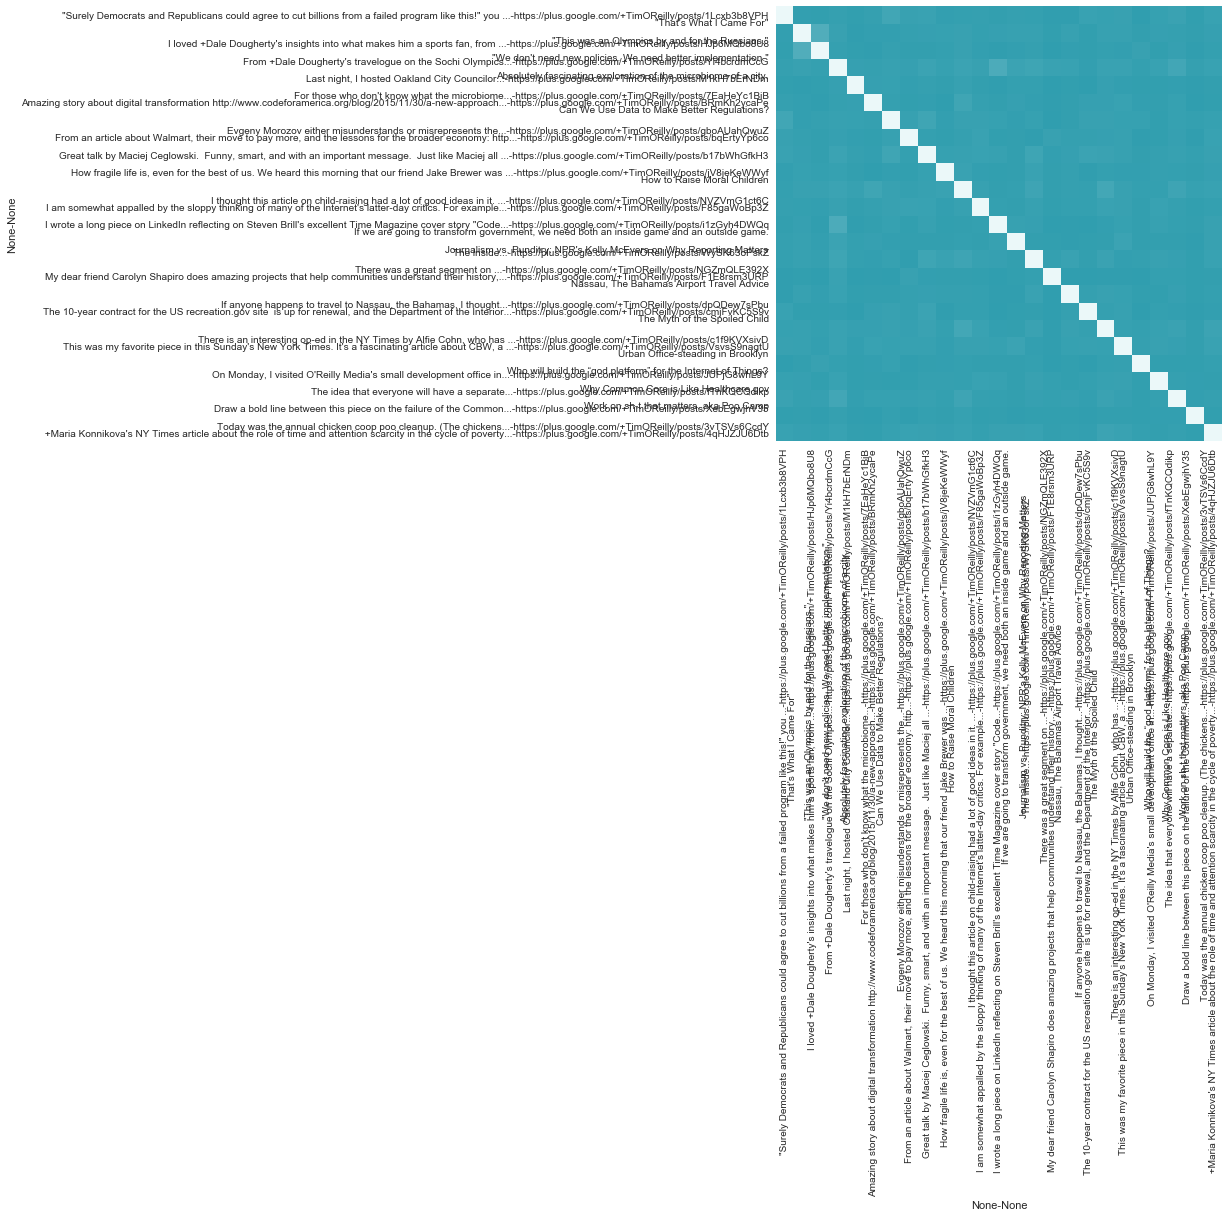

In [ ]:
import pandas as p
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig = plt.figure( figsize=(8,8) )

ax = fig.add_subplot(111)

df = p.DataFrame(distances)

for i in range(len(df)):
    df.ix[i,i]=0

pal = sns.light_palette((210, 90, 60), input="husl",as_cmap=True)
g = sns.heatmap(df, yticklabels = True, xticklabels = True, cbar=False, cmap=pal)

### Clustering Hierarchique

In [ ]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

df = p.DataFrame(distances)

for i in range(len(df)):
    df.ix[i,i]=0

dist = sp.distance.squareform(df)

In [ ]:
from pkg_resources import parse_version
import scipy
if parse_version(scipy.__version__) <= parse_version('0.17.1'):
    # Il peut y avoir quelques soucis avec la méthode Ward
    data_link = hc.linkage(dist, method='single')
else:
    data_link = hc.linkage(dist, method='ward')

c:\python35_x64\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


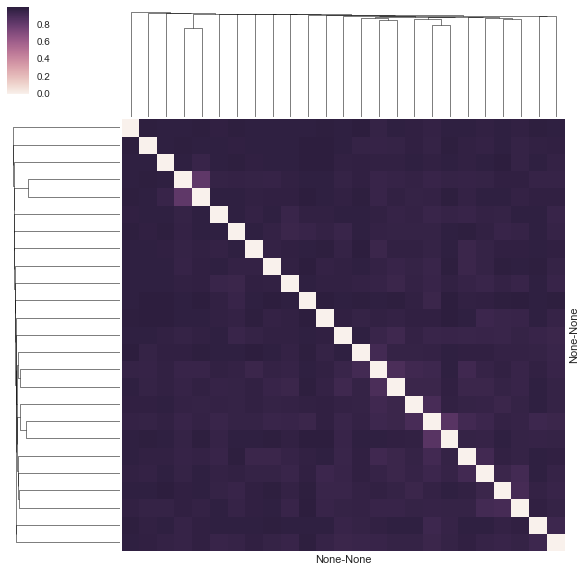

In [ ]:
fig = plt.figure( figsize=(8,8) )
g = sns.clustermap(df, row_linkage=data_link, col_linkage=data_link,
                   yticklabels = False, xticklabels = False, )
# instance de l'objet axes, c'est un peu caché :)
ax = g.ax_heatmap  

On voit que les documents sont globalement assez différents les uns des autres.

## Exercice 5

Comparaison des différentes fonctions de distances.

In [ ]:
import json
import nltk


path = 'ressources_googleplus/107033731246200681024.json'
data = json.loads(open(path).read())

# Nombre de co-occurrences à trouver

N = 25

all_tokens = [token for activity in data for token in \
              activity['object']['content'].lower().split()]

finder = nltk.BigramCollocationFinder.from_words(all_tokens)
finder.apply_freq_filter(2)

#filtre des mots trop fréquents

finder.apply_word_filter(lambda w: w in nltk.corpus.stopwords.words('english'))

bim = nltk.collocations.BigramAssocMeasures()

distances_func = [bim.raw_freq, bim.jaccard, bim.dice, bim.student_t,\
                 bim.chi_sq, bim.likelihood_ratio, bim.pmi]

collocations={}
collocations_sets={}

for d in distances_func:
    collocations[d] = finder.nbest(d,N)
    collocations_sets[d] = set([' '.join(c) for c in collocations[d]])
    print('\n')
    print(d)
    for collocation in collocations[d]:
        c = ' '.join(collocation)
        print(c)



<function NgramAssocMeasures.raw_freq at 0x000002161C4ADC80>
silicon valley
open data
+jennifer pahlka
next:economy summit
well worth
common core
new york
white house
"we don't
bay mini
cabo pulmo
child welfare
children feel
credit card
east bay
economic impact
granite workers
healthcare.gov rescue
it's also
it's easy
last year
maker faire
mini maker
need new
never search


<bound method NgramAssocMeasures.jaccard of <class 'nltk.metrics.association.BigramAssocMeasures'>>
+dale dougherty's
+jenn webb
barre historical
cabo pulmo
expressing disappointment
kqed forum
nbc press:here
negative judgment
soap opera
ts eliot
wood fired
+jennifer pahlka
silicon valley
+jim stogdill
acted generously,
historical society
jaron lanier's
models say,
private sector
pulmo sunrise﻿
stays news."
bay mini
credit card
east bay
on-demand economy,


<function BigramAssocMeasures.dice at 0x000002161C4B4488>
+dale dougherty's
+jenn webb
barre historical
cabo pulmo
expressing disappointment
kqed forum
nbc pre

Pour comparer les sets deux à deux, on peut calculer de nouveau une distance de jaccard... des sets de collocations.

In [ ]:
for d1 in distances_func:
    for d2 in distances_func:
        if d1 != d2:
            jac = len(collocations_sets[d1].intersection(collocations_sets[d2])) / \
                  len(collocations_sets[d1].union(collocations_sets[d2]))
            if jac > 0.8:
                print('Méthode de distances comparables')
                print(jac,'\n'+str(d1),'\n'+str(d2))
                print('\n')

print('\n')
print('\n')
for d1 in distances_func:
    for d2 in distances_func:
        if d1 != d2:
            jac = len(collocations_sets[d1].intersection(collocations_sets[d2])) / \
                  len(collocations_sets[d1].union(collocations_sets[d2]))               
            if jac < 0.2:
                print('Méthode de distances avec des résultats très différents')
                print(jac,'\n'+str(d1),'\n'+str(d2))
                print('\n')

Méthode de distances comparables
1.0 
<bound method NgramAssocMeasures.jaccard of <class 'nltk.metrics.association.BigramAssocMeasures'>> 
<function BigramAssocMeasures.dice at 0x000002161C4B4488>


Méthode de distances comparables
0.9230769230769231 
<bound method NgramAssocMeasures.jaccard of <class 'nltk.metrics.association.BigramAssocMeasures'>> 
<bound method BigramAssocMeasures.chi_sq of <class 'nltk.metrics.association.BigramAssocMeasures'>>


Méthode de distances comparables
1.0 
<function BigramAssocMeasures.dice at 0x000002161C4B4488> 
<bound method NgramAssocMeasures.jaccard of <class 'nltk.metrics.association.BigramAssocMeasures'>>


Méthode de distances comparables
0.9230769230769231 
<function BigramAssocMeasures.dice at 0x000002161C4B4488> 
<bound method BigramAssocMeasures.chi_sq of <class 'nltk.metrics.association.BigramAssocMeasures'>>


Méthode de distances comparables
0.8518518518518519 
<bound method NgramAssocMeasures.student_t of <class 'nltk.metrics.association.

In [ ]:
import json
import nltk


path = 'ressources_googleplus/107033731246200681024.json'
data = json.loads(open(path).read())

# Nombre de co-occurrences à trouver

N = 25

all_tokens = [token for activity in data for token in \
              activity['object']['content'].lower().split()]

finder = nltk.TrigramCollocationFinder.from_words(all_tokens)
finder.apply_freq_filter(2)

#filtre des mots trop fréquents

finder.apply_word_filter(lambda w: w in nltk.corpus.stopwords.words('english'))

trigram_measures = nltk.collocations.TrigramAssocMeasures()

collocations = finder.nbest(trigram_measures.jaccard, N)

for collocation in collocations:
    c = ' '.join(collocation)
    print(c)

barre historical society
cabo pulmo sunrise﻿
east bay mini
nbc press:here tv
adult acted generously,
bay mini maker
italian granite workers
mini maker faire
role models say,
press:here tv interview
child welfare system
oakland next sunday.
well worth reading.
abc world news
open source software
really looking forward
"we don't need
new york times.
need new policies.
don't need new
